In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from astropy.wcs import WCS
from reproject import reproject_interp
from astropy.wcs.utils import proj_plane_pixel_scales as pixscales
import numpy as np
import pandas as pd
import glob
import astropy.units as u
from astropy.coordinates import SkyCoord
# conda install photutils -c astropy
from photutils.aperture import aperture_photometry
from photutils.aperture import SkyCircularAperture
from matplotlib.ticker import MultipleLocator
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel


In [40]:
pip= '/Users/seftekh1/sofia_redux/hawc/sofia_redux/instruments/hawc/data/skycals/fs15/'
pipDflat = glob.glob(pip+'/sflat_*D*.fits')

scflat = '/Users/seftekh1/Desktop/highTemp/F892_raw_D/F0892_HA_POL_09004849_HAWDHWPD_SCL_074-109.fits'

p = fits.open(pipDflat[0])
s = fits.open(scflat)

p.info(), s.info()

Filename: /Users/seftekh1/sofia_redux/hawc/sofia_redux/instruments/hawc/data/skycals/fs15/sflat_D_D_F445_119-121_v1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  R ARRAY GAIN    1 PrimaryHDU      13   (64, 41)   float64   
  1  T ARRAY GAIN    1 ImageHDU         8   (64, 41)   float64   
  2  R BAD PIXEL MASK    1 ImageHDU         8   (64, 41)   float64   
  3  T BAD PIXEL MASK    1 ImageHDU         8   (64, 41)   float64   
Filename: /Users/seftekh1/Desktop/highTemp/F892_raw_D/F0892_HA_POL_09004849_HAWDHWPD_SCL_074-109.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  R ARRAY GAIN    1 PrimaryHDU     280   (64, 41)   float64   
  1  T ARRAY GAIN    1 ImageHDU         8   (64, 41)   float64   
  2  R BAD PIXEL MASK    1 ImageHDU         8   (64, 41)   int64   
  3  T BAD PIXEL MASK    1 ImageHDU         8   (64, 41)   int64   


(None, None)

In [41]:
prg = p[0].data
ptg = p[1].data
prb = p[2].data
ptb = p[3].data


srg = s[0].data
stg = s[1].data
srb = s[2].data
stb = s[3].data

# np.shape(srg), np.shape(srb),np.shape(prg),np.shape(prb),np.shape(ptg),np.shape(ptb)


sflat_info = {}#pd.DataFrame()
pflat_info = {}#pd.DataFrame()

sflat_info['R Min'] = np.nanmin(srg)#(sflat['R Gain Data'])
sflat_info['R Max'] = np.nanmax(srg)#(sflat['R Gain Data'])
sflat_info['R Median'] = np.nanmedian(srg)#(sflat['R Gain Data'])
sflat_info['R StdDev'] = np.nanstd(srg)#(sflat['R Gain Data'])
sflat_info['T Min'] = np.nanmin(stg)#(sflat['T Gain Data'])
sflat_info['T Max'] = np.nanmax(stg)#(sflat['T Gain Data'])
sflat_info['T Median'] = np.nanmedian(stg)#(sflat['T Gain Data'])
sflat_info['T StdDev'] = np.nanstd(stg)#(sflat['T Gain Data'])


pflat_info['R Min'] = np.nanmin(prg)#(sflat['R Gain Data'])
pflat_info['R Max'] = np.nanmax(prg)#(sflat['R Gain Data'])
pflat_info['R Median'] = np.nanmedian(prg)#(sflat['R Gain Data'])
pflat_info['R StdDev'] = np.nanstd(prg)#(sflat['R Gain Data'])
pflat_info['T Min'] = np.nanmin(ptg)#(sflat['T Gain Data'])
pflat_info['T Max'] = np.nanmax(ptg)#(sflat['T Gain Data'])
pflat_info['T Median'] = np.nanmedian(ptg)#(sflat['T Gain Data'])
pflat_info['T StdDev'] = np.nanstd(ptg)#(sflat['T Gain Data'])

pflat_info, sflat_info

<ipython-input-41-ed428def2b15>:18: RuntimeWarning: All-NaN slice encountered
  sflat_info['R Min'] = np.nanmin(srg)#(sflat['R Gain Data'])
<ipython-input-41-ed428def2b15>:19: RuntimeWarning: All-NaN slice encountered
  sflat_info['R Max'] = np.nanmax(srg)#(sflat['R Gain Data'])
<ipython-input-41-ed428def2b15>:22: RuntimeWarning: All-NaN slice encountered
  sflat_info['T Min'] = np.nanmin(stg)#(sflat['T Gain Data'])
<ipython-input-41-ed428def2b15>:23: RuntimeWarning: All-NaN slice encountered
  sflat_info['T Max'] = np.nanmax(stg)#(sflat['T Gain Data'])


({'R Min': 0.9220306277275085,
  'R Max': 2.704833745956421,
  'R Median': 1.1942031383514404,
  'R StdDev': 0.15561409294776704,
  'T Min': 0.8120197057723999,
  'T Max': 2.377937078475952,
  'T Median': 1.4117745161056519,
  'T StdDev': 0.23634201588194645},
 {'R Min': nan,
  'R Max': nan,
  'R Median': nan,
  'R StdDev': nan,
  'T Min': nan,
  'T Max': nan,
  'T Median': nan,
  'T StdDev': nan})

In [28]:
np.nanmin(prg)

0.9220306277275085

In [42]:
## 0.17K 
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_F916_000_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_F916_001_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_F916_002_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_F916_039_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_F916_042_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_F916_073_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_F916_074_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_XXXX_000_CAL_unk_HAWD_HWPD_RAW.fits
#-------------------------
# /persistent_front/missions/2022/2022-09-29_HA_F921/raw/r0/data/si/20220929/2022-09-29_HA_F921_000_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-29_HA_F921/raw/r0/data/si/20220929/2022-09-29_HA_F921_001_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-29_HA_F921/raw/r0/data/si/20220929/2022-09-29_HA_F921_098_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-29_HA_F921/raw/r0/data/si/20220929/2022-09-29_HA_XXXX_000_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-29_HA_F921/raw/r0/data/si/20220929/2022-09-29_HA_XXXX_001_CAL_unk_HAWD_HWPD_RAW.fits
#-------------------------
# /persistent_front/missions/2022/2022-09-28_HA_F920/raw/r0/data/si/20220928/2022-09-28_HA_F920_000_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-28_HA_F920/raw/r0/data/si/20220928/2022-09-28_HA_F920_001_CAL_unk_HAWD_HWPD_RAW.fits
#-------------------------
# /persistent_front/missions/2022/2022-09-27_HA_F919/raw/r0/data/si/20220927/2022-09-27_HA_F919_000_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-27_HA_F919/raw/r0/data/si/20220927/2022-09-27_HA_F919_090_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-27_HA_F919/raw/r0/data/si/20220927/2022-09-27_HA_F919_131_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-27_HA_F919/raw/r0/data/si/20220927/2022-09-27_HA_F919_161_CAL_unk_HAWD_HWPD_RAW.fits
#-------------------------
# /persistent_front/missions/2022/2022-09-23_HA_F918/raw/r0/data/si/20220923/2022-09-23_HA_F918_000_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-23_HA_F918/raw/r0/data/si/20220923/2022-09-23_HA_F918_127_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-23_HA_F918/raw/r0/data/si/20220923/2022-09-23_HA_F918_128_CAL_unk_HAWD_HWPD_RAW.fits
#-------------------------
# /persistent_front/missions/2022/2022-09-22_HA_F917/raw/r0/data/si/20220922/2022-09-22_HA_F917_000_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-22_HA_F917/raw/r0/data/si/20220922/2022-09-22_HA_F917_099_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-22_HA_F917/raw/r0/data/si/20220922/2022-09-22_HA_F917_100_CAL_unk_HAWD_HWPD_RAW.fits
#-------------------------
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_F916_000_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_F916_001_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_F916_002_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_F916_039_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_F916_042_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_F916_073_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_F916_074_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-09-21_HA_F916/raw/r0/data/si/20220921/2022-09-21_HA_XXXX_000_CAL_unk_HAWD_HWPD_RAW.fits
#-------------------------
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r0/data/si/20220705/2022-07-05_HA_F894_000_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r0/data/si/20220705/2022-07-05_HA_F894_001_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r0/data/si/20220705/2022-07-05_HA_F894_002_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r0/data/si/20220705/2022-07-05_HA_F894_003_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r0/data/si/20220705/2022-07-05_HA_F894_004_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r0/data/si/20220705/2022-07-05_HA_F894_037_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r0/data/si/20220705/2022-07-05_HA_F894_139_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r0/data/si/20220705/2022-07-05_HA_F894_164_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r0/data/si/20220705/2022-07-05_HA_F894_165_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r1/data/si/20220705/2022-07-05_HA_F894_002_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r1/data/si/20220705/2022-07-05_HA_F894_003_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r1/data/si/20220705/2022-07-05_HA_F894_004_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r1/data/si/20220705/2022-07-05_HA_F894_037_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r1/data/si/20220705/2022-07-05_HA_F894_139_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r1/data/si/20220705/2022-07-05_HA_F894_164_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-07-05_HA_F894/raw/r1/data/si/20220705/2022-07-05_HA_F894_165_CAL_unk_HAWD_HWPD_RAW.fits
#-------------------------
# /persistent_front/missions/2021/2021-12-09_HA_F802/raw/r0/data/si/20211209/2021-12-09_HA_F802_026_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-12-09_HA_F802/raw/r0/data/si/20211209/2021-12-09_HA_F802_200_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-12-09_HA_F802/raw/r0/data/si/20211209/2021-12-09_HA_F802_209_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-12-09_HA_F802/raw/r0/data/si/20211209/2021-12-09_HA_F802_210_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-12-09_HA_F802/raw/r0/data/si/20211209/2021-12-09_HA_F802_211_CAL_unk_HAWD_HWPD_RAW.fits
#-------------------------
# /persistent_front/missions/2021/2021-05-19_HA_F734/raw/r0/data/si/20210519/2021-05-19_HA_F734_001_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-05-19_HA_F734/raw/r0/data/si/20210519/2021-05-19_HA_F734_002_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-05-19_HA_F734/raw/r0/data/si/20210519/2021-05-19_HA_F734_051_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-05-19_HA_F734/raw/r0/data/si/20210519/2021-05-19_HA_F734_052_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-05-19_HA_F734/raw/r0/data/si/20210519/2021-05-19_HA_F734_097_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-05-19_HA_F734/raw/r0/data/si/20210519/2021-05-19_HA_F734_098_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-05-19_HA_F734/raw/r0/data/si/20210519/2021-05-19_HA_F734_099_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-05-19_HA_F734/raw/r0/data/si/20210519/2021-05-19_HA_F734_175_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-05-19_HA_F734/raw/r0/data/si/20210519/2021-05-19_HA_F734_176_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-05-19_HA_F734/raw/r0/data/si/20210519/2021-05-19_HA_F734_199_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-05-19_HA_F734/raw/r0/data/si/20210519/2021-05-19_HA_F734_200_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-05-19_HA_F734/raw/r0/data/si/20210519/2021-05-19_HA_F734_201_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-05-19_HA_F734/raw/r0/data/si/20210519/2021-05-19_HA_XXXX_000_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2021/2021-05-19_HA_F734/raw/r1/data/si/20210519/2021-05-19_HA_XXXX_000_CAL_unk_HAWD_HWPD_RAW.fits
#-------------------------
# T = 0.225K
#------------------------- 
# /persistent_front/missions/2022/2022-06-30_HA_F892/raw/r0/data/si/20220630/2022-06-30_HA_F892_000_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-06-30_HA_F892/raw/r0/data/si/20220630/2022-06-30_HA_F892_073_CAL_unk_HAWD_HWPD_RAW.fits
# /persistent_front/missions/2022/2022-06-30_HA_F892/raw/r1/data/si/20220630/2022-06-30_HA_F892_073_CAL_unk_HAWD_HWPD_RAW.fits




## Reduced INTCAL products: OFT vs DMD

In [45]:
dmd = '/Users/seftekh1/Desktop/highTemp/intcals_170mK/F0916_HA_CAL_unk_HAWDHWPD_DMD_042.fits'

oft = '/Users/seftekh1/Desktop/highTemp/intcals_170mK/flats/F0916_HA_CAL_unk_HAWDHWPD_OFT_042.fits'

dm = fits.open(dmd)

of = fits.open(oft)

dm.info(), of.info()


Filename: /Users/seftekh1/Desktop/highTemp/intcals_170mK/F0916_HA_CAL_unk_HAWDHWPD_DMD_042.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     233   ()      
  1  CONFIGURATION    1 ImageHDU      1782   (1,)   int32   
  2  DEMODULATED DATA    1 BinTableHDU    221   85R x 67C   [1J, 2624D, 2624D, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1J, 1J, 1K, 1K, 1J, 1E, 1E, 1J, 1E, 1E, 1E, 1E, 1E, 1E, 1B, 1E, 1E, 1E, 1E, 1E, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1J, 1D, 1J, 1D, 1D, 1D, 1J, 1J, 1J, 2624D, 2624D, 1E, 1E, 1J, 2624D, 2624D, 2624D, 2624D, 2624E, 2624E]   
Filename: /Users/seftekh1/Desktop/highTemp/intcals_170mK/flats/F0916_HA_CAL_unk_HAWDHWPD_OFT_042.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  R ARRAY GAIN    1 PrimaryHDU     253   (64, 41)   float64   
  1  T ARRAY GAIN    1 ImageHDU         8   (64, 41)   float64   
  2  R ARRAY GAIN VAR    1 ImageHDU         8   (64, 41)   float64   
  

(None, None)

In [71]:
path = '/Users/seftekh1/Desktop/highTemp/'
nts= ['intcals_170mK/flats/F0734_HA_CAL_unk_HAWDHWPD_OFT_052.fits',
      'intcals_170mK/flats/F0802_HA_CAL_unk_HAWDHWPD_OFT_026.fits',
      'intcals_170mK/flats/F0894_HA_CAL_unk_HAWDHWPD_OFT_139.fits',
      'intcals_170mK/flats/F0916_HA_CAL_unk_HAWDHWPD_OFT_042.fits',
      'intcals_170mK/flats/F0921_HA_CAL_unk_HAWDHWPD_OFT_098.fits']


hts=['intcals_225mK/flats/F0892_HA_CAL_unk_HAWDHWPD_OFT_073.fits']

In [112]:
vmin=0
vmax=1.5
np.arange(vmin,vmax+1,0.5)

array([0. , 0.5, 1. , 1.5, 2. ])

R Array Gain- median:0.9992403741601315, STD: 0.324271157311068, min: 0.3122904365545969, max: 3.083532997311778
T Array Gain- median:0.5728586811792129, STD: 0.1139461763127733, min: 0.19988465579876968, max: 1.8433031341974844
F0734_HA_CAL_unk_HAWDHWPD_OFT_052.fits
R Array Gain- median:0.8999019191005229, STD: 0.26560230219669445, min: 0.19771611148595541, max: 2.3052816050686067
T Array Gain- median:0.6022600233904769, STD: 0.11366871593382258, min: 0.20486817171541172, max: 1.3982992394377503
170mK/225mK Gain ratio R array- median:0.9056876478439738, STD: 0.11921600638612073, min: 0.4866190323144317, max: 2.2257825283733434
170mK/225mK Gains ratio T array- median:1.0370067679004977, STD: 0.15446778992639304, min: 0.6557170658021337, max: 2.0852126406803655
------------
F0802_HA_CAL_unk_HAWDHWPD_OFT_026.fits
R Array Gain- median:1.0501630259366097, STD: 0.2714669814137022, min: 0.4070103652176024, max: 2.5734510323347206
T Array Gain- median:0.7637693656310289, STD: 0.13872292790699

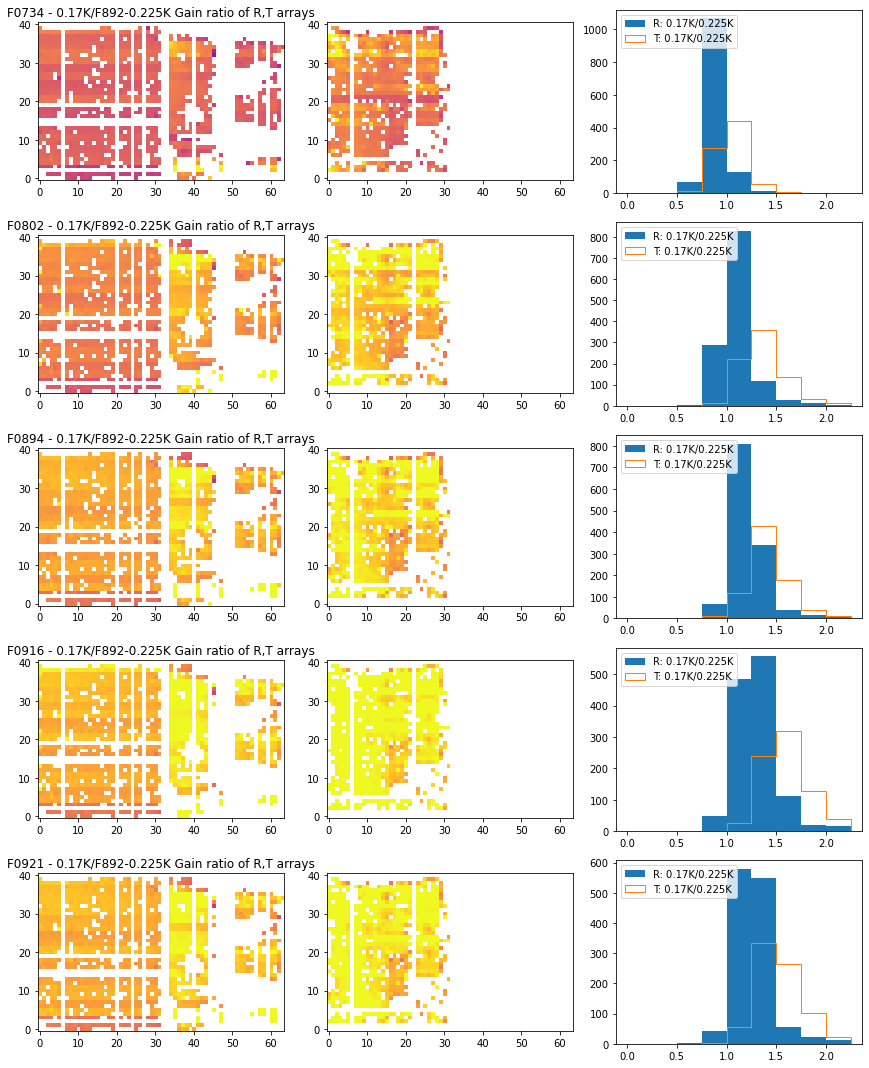

In [115]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


figure, axis = plt.subplots(nrows=5, ncols=3, figsize=(12, 15), sharex=False, sharey=False)#(4, 2,figsize=(20,10),constrained_layout = True)
h = fits.open(path+hts[0])
hrg = h[0].data
htg = h[1].data
print(('R Array Gain- median:{}, STD: {}, min: {}, max: {}').format(np.nanmedian(hrg), np.nanstd(hrg), np.nanmin(hrg), np.nanmax(arg)))
print(('T Array Gain- median:{}, STD: {}, min: {}, max: {}').format(np.nanmedian(htg), np.nanstd(htg), np.nanmin(htg), np.nanmax(atg)))

vmin=0
vmax=1.5

for i,f in enumerate(nts):
    print((path+f).split('/')[-1])
    n = (path+f).split('/')[-1]
    fl = n.split('_')[0]
    a = fits.open(path+f)
    arg = a[0].data
    atg = a[1].data
    print(('R Array Gain- median:{}, STD: {}, min: {}, max: {}').format(np.nanmedian(arg), np.nanstd(arg), np.nanmin(arg), np.nanmax(arg)))
    print(('T Array Gain- median:{}, STD: {}, min: {}, max: {}').format(np.nanmedian(atg), np.nanstd(atg), np.nanmin(atg), np.nanmax(atg)))
    rr = arg/hrg
    tt = atg/htg
    print(('170mK/225mK Gain ratio R array- median:{}, STD: {}, min: {}, max: {}').format(np.nanmedian(rr), np.nanstd(rr), np.nanmin(rr), np.nanmax(rr)))
    print(('170mK/225mK Gains ratio T array- median:{}, STD: {}, min: {}, max: {}').format(np.nanmedian(tt), np.nanstd(tt), np.nanmin(tt), np.nanmax(tt)))
    print('------------')
    axis[i, 0].imshow(rr,cmap='plasma',vmin=vmin,vmax=vmax, origin='lower')
    axis[i, 0].set_title(fl+' - 0.17K/F892-0.225K Gain ratio of R,T arrays')
    im = axis[i, 1].imshow(tt,cmap='plasma',vmin=vmin,vmax=vmax, origin='lower')
#     divider = make_axes_locatable(axis[i, 1])
#     cax = divider.append_axes('right', size='5%', pad=0.05)
#     plt.colorbar(im,cax=cax, orientation='vertical')
    axis[i,2].hist(rr.reshape(-1), bins=np.arange(vmin,vmax+1,0.25),label='R: 0.17K/0.225K')
    axis[i,2].hist(tt.reshape(-1), bins=np.arange(vmin,vmax+1,0.25),histtype='step',label='T: 0.17K/0.225K')
    axis[i,2].legend(loc='upper left')



figure.tight_layout(pad=1.0)

In [ ]:
fig = plt.figure(figsize=(9,3))

ax = fig.add_axes([0,0.,.4,1])#, projection = wcstot)
ax.title.set_text('Gains R arrays - T=0.170K, 0.225K')
im =ax.hist(htr.reshape(-1), bins=np.arange(vmin,vmax+1,1),label='T=0.225K')
im =ax.hist(ltr.reshape(-1), bins=np.arange(vmin,vmax+1,1),histtype='step',label='T=0.170K')
ax.legend()

ax = fig.add_axes([0.45,0.,.4,1])#, projection = wcstot)
ax.title.set_text('Gains T arrays - T=0.170K, 0.225K')
im=ax.hist(htt.reshape(-1), bins=[0,1,2,3],label='T=0.225K')
im =ax.hist(ltt.reshape(-1), bins=np.arange(vmin,vmax+1,1),histtype='step',label='T=0.170K')
ax.legend()


In [ ]:

    
    # fpath = '/Users/seftekh1/sofia_redux/hawc/sofia_redux/instruments/hawc/data/legacy_flats/oc4l/'
# cc '2016-12-09_HA_F357_055-060_CAL_0401073_HAWC_HWPC_OFT.fits'
# aa '2016-12-09_HA_F357_071-076_CAL_88000520_HAWA_HWPA_OFT.fits'
# dd '2016-12-09_HA_F357_095-100_CAL_88000521_HAWD_HWPD_OFT.fits'
# ee '2016-12-14_HA_F358_012-017_CAL_0400261_HAWE_HWPE_OFT.fits'

fpath = '/Users/seftekh1/Desktop/highTemp/intcals_170mK/'


c = fits.open(fpath+'sflat_C_C_F446_066-068_v1.fits')
cr = c[2].data
ct = c[3].data

a = fits.open(fpath+'sflat_A_A_F445_127-129_v1.fits')
ar = a[2].data
at = a[3].data

d = fits.open(fpath+'sflat_D_D_F445_119-121_v1.fits')
dr = d[2].data
dt = d[3].data

e = fits.open(fpath+'sflat_E_E_F446_051-053_v1.fits')
er = e[2].data
et = e[3].data

vmin=0
vmax=1


figure, axis = plt.subplots(nrows=4, ncols=2, figsize=(8, 11), sharex=False, sharey=True)#(4, 2,figsize=(20,10),constrained_layout = True)
  
arr = ar[~np.isnan(ar)]
w0 = np.where(ar==0)
axis[0, 0].imshow(ar,cmap='plasma',vmin=vmin,vmax=vmax,origin='lower')
axis[0, 0].set_title("R array - Band A; "+str(int(np.size(ar[w0])))+' good pixels')
w0 = np.where(at==0)
axis[0, 1].imshow(at,cmap='plasma',vmin=vmin,vmax=vmax, origin='lower')
axis[0, 1].set_title("T array - Band A; "+str(int(np.size(at[w0])))+' good pixels')

crr = cr[~np.isnan(cr)]
w0 = np.where(cr==0)
axis[1, 0].imshow(cr,cmap='plasma',vmin=vmin,vmax=vmax, origin='lower')
axis[1, 0].set_title("R array - Band C; "+str(int(np.size(cr[w0])))+' good pixels')
w0 = np.where(ct==0)
axis[1, 1].imshow(ct,cmap='plasma',vmin=vmin,vmax=vmax, origin='lower')
axis[1, 1].set_title("T array - Band C; "+str(int(np.size(ct[w0])))+' good pixels')

drr = dr[~np.isnan(dr)]
w0 = np.where(dr==0)
axis[2, 0].imshow(dr,cmap='plasma',vmin=vmin,vmax=vmax, origin='lower')
axis[2, 0].set_title("R array - Band D; "+str(int(np.size(dr[w0])))+' good pixels')
w0 = np.where(dt==0)
axis[2, 1].imshow(dt,cmap='plasma',vmin=vmin,vmax=vmax, origin='lower')
axis[2, 1].set_title("T array - Band D; "+str(int(np.size(dt[w0])))+' good pixels')

err = er[~np.isnan(er)]
w0 = np.where(er==0)
axis[3, 0].imshow(er,cmap='plasma',vmin=vmin,vmax=vmax, origin='lower')
axis[3, 0].set_title("R array - Band E; "+str(int(np.size(er[w0])))+' good pixels')
w0 = np.where(et==0)
axis[3, 1].imshow(et,cmap='plasma',vmin=vmin,vmax=vmax, origin='lower')
axis[3, 1].set_title("T array - Band E; "+str(int(np.size(et[w0])))+' good pixels')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.5, top=0.9,wspace=0.5,hspace=0.2)
figure.tight_layout()

plt.savefig('/Users/seftekh1/Desktop/HAWC_HQ/performance_documentation/'+'Allbands_badpixmaskv2.png',bbox_inches='tight')
plt.show()
